## MEDICAL COST ANALYSIS

#### OBJECTIVE
> To explore the intricacies of medical costs and healthcare expenses

### DATASET
> The dataset offers valuable insights into the factors influencing medical charges, enabling researchers, analysts, and healthcare professionals to gain a deeper understanding of the dynamics within the healthcare industry.
> Dataset columns are: ID, Age, Sex, BMI, Children, Smoker, Region, Charges.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Understanding the Dataset (Data preparation)

In [2]:
data = pd.read_csv("medical_cost.csv")

In [3]:
data.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [5]:
#check for all missing values

#data.dropna(subset=['Id'], inplace = True)

print(data.isnull().sum())

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


> No missing values

In [6]:
print(data.duplicated().sum())

0


> No duplicates

In [7]:
#Ensuring the right data types

data['smoker'] = data['smoker'].astype('category')  # Convert Smoker to categorical
data['region'] = data['region'].astype('category')  # Convert Region to categorical
data['sex'] = data['sex'].astype('category')  # Convert Sex to categorical

print("\nData types after conversion:")
print(data.dtypes)


Data types after conversion:
Id             int64
age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


> All columns now in the correct data types

In [8]:
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median(), data[column])


In [9]:
for col in ['bmi', 'charges']:
    handle_outliers(data, col)

In [10]:
data.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.536424,1.094918,9871.060475
std,386.391641,14.049960,5.899998,1.205493,6856.444150
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9379.968850
75%,1003.750000,51.000000,34.430000,2.000000,12269.424550
max,1338.000000,64.000000,46.750000,5.000000,34472.841000


In [11]:
# Check if the ID column is unique
if data['Id'].nunique() == len(data):
    print("\nID column is unique.")
else:
    print("\nID column has duplicates. Investigate further.")


ID column is unique.


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Id        1338 non-null   int64   
 1   age       1338 non-null   int64   
 2   sex       1338 non-null   category
 3   bmi       1338 non-null   float64 
 4   children  1338 non-null   int64   
 5   smoker    1338 non-null   category
 6   region    1338 non-null   category
 7   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(3)
memory usage: 56.8 KB


In [13]:
df = data

#### Univariate Analysis

##### Distribution of Numeric Variables (Age, BMI, Children, and Charges)

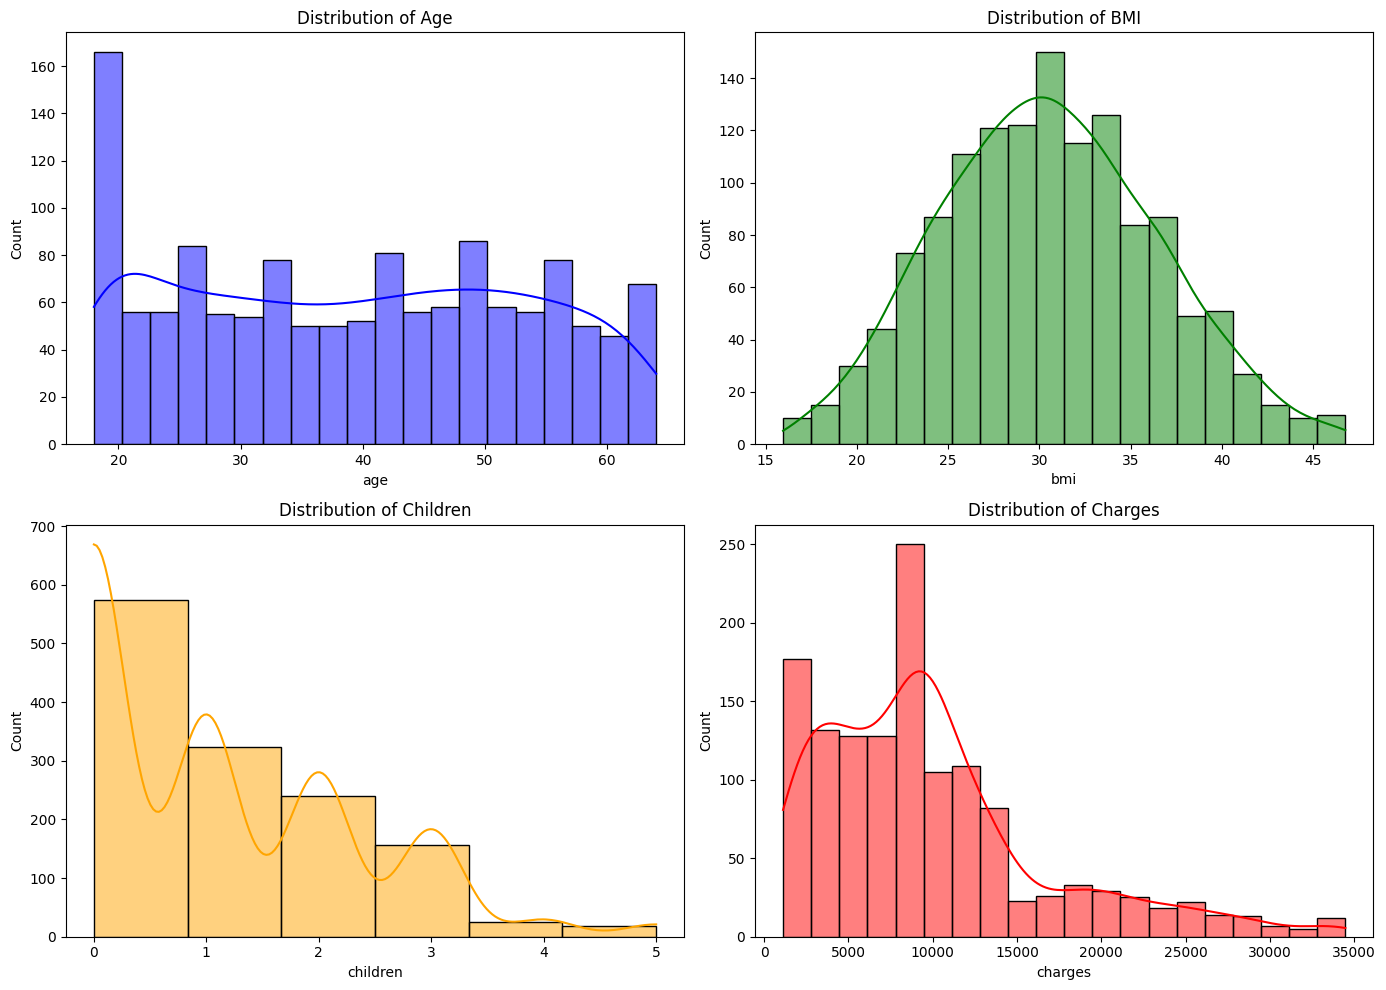

In [14]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot histograms for numeric variables
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Age')

sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of BMI')

sns.histplot(df['children'], bins=6, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribution of Children')

sns.histplot(df['charges'], bins=20, kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Distribution of Charges')

plt.tight_layout()
plt.show()


> Insights:

> Age: The distribution is relatively uniform, with a peak at 20 years.

> BMI: The distribution is roughly normal, centered around 30, which is the threshold for obesity.

> Children: Most patients have 0-2 children, with very few having 4 or 5.

> Charges: The distribution is right-skewed, indicating that most patients have lower medical costs with a peak around 8000 - 9000, but a few have very high costs.

##### Frequency Distribution of Categorical Variables (Sex, Smoker, Region)

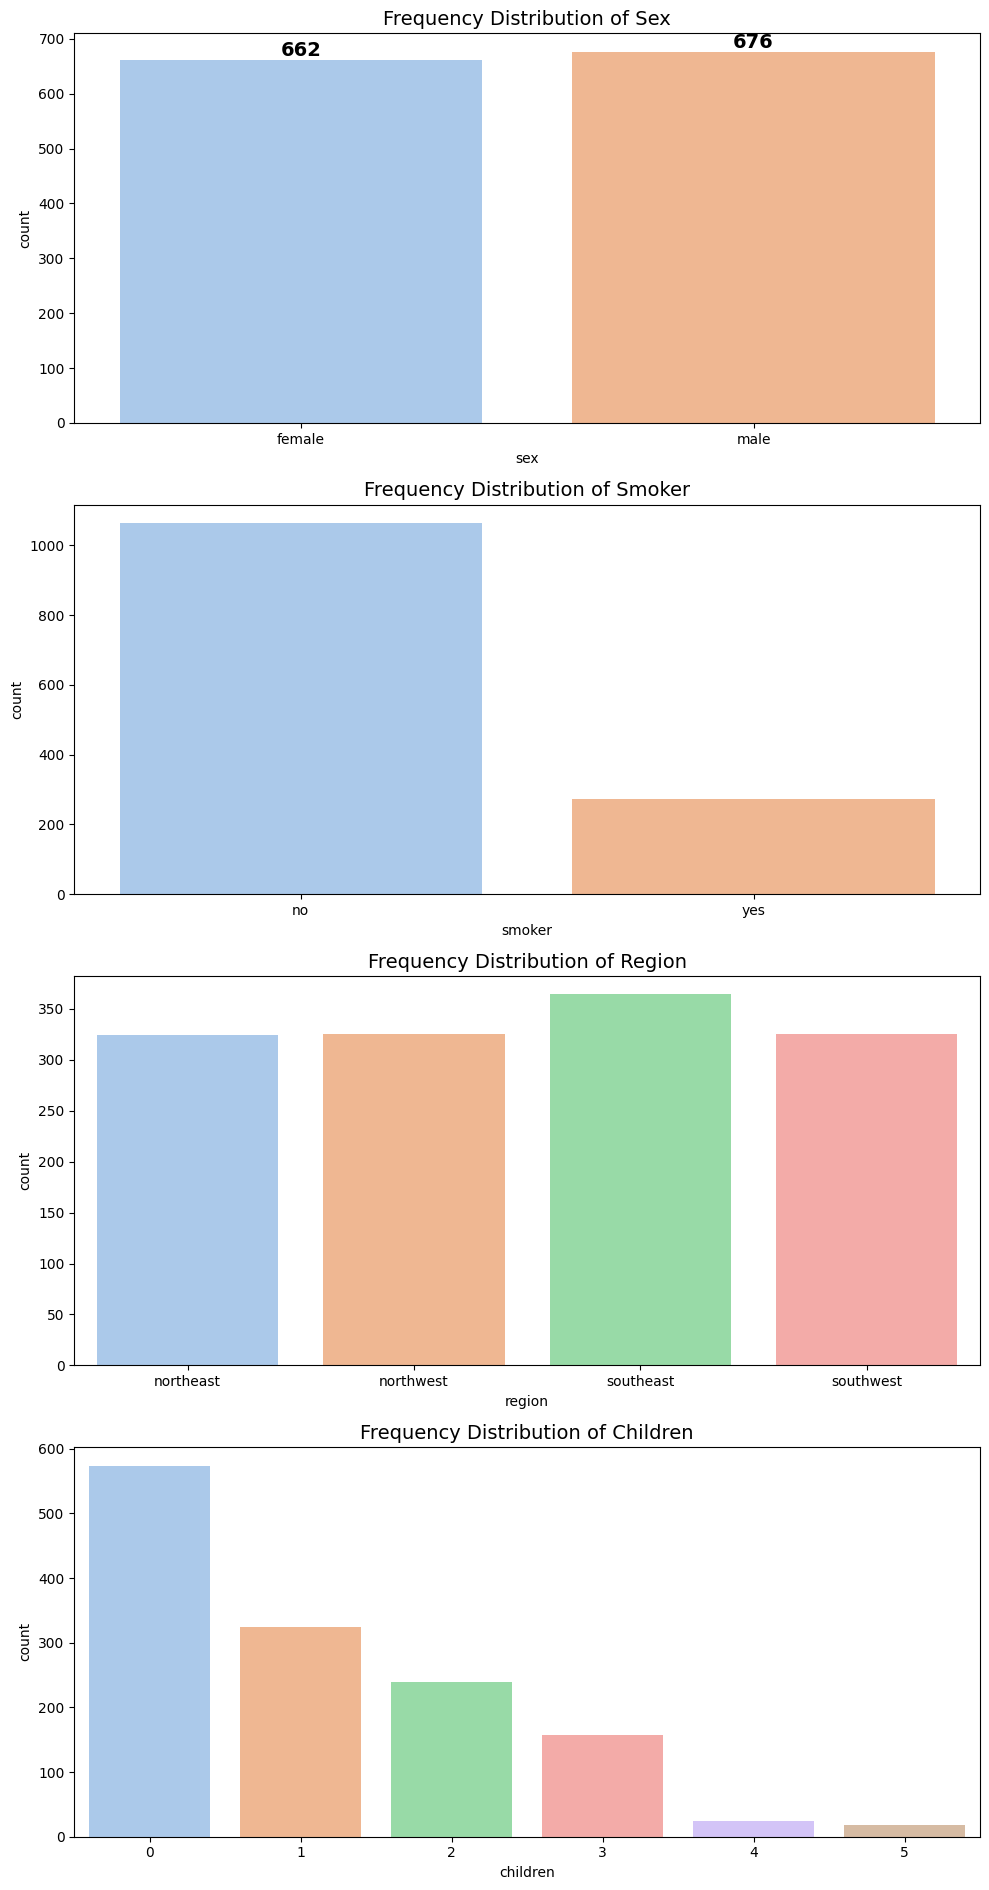

In [15]:
# Set up the figure and axes
fig, axes = plt.subplots(4, 1, figsize=(10, 19))

# Plot bar charts for categorical variables
ax=sns.countplot(x='sex', data=df, ax=axes[0], hue = 'sex', palette='pastel', legend = False)
axes[0].set_title('Frequency Distribution of Sex', fontsize = 14)

sns.countplot(x='smoker', data=df, ax=axes[1], hue = 'smoker', palette='pastel',legend = False)
axes[1].set_title('Frequency Distribution of Smoker', fontsize = 14)

sns.countplot(x='region', data=df, ax=axes[2], hue = 'region',palette='pastel',legend = False)
axes[2].set_title('Frequency Distribution of Region', fontsize = 14)

sns.countplot(x='children', data=df, ax=axes[3], hue = 'children',palette='pastel',legend = False)
axes[3].set_title('Frequency Distribution of Children', fontsize = 14)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

##### Relationships between variables (Age, BMI, Region) and charges

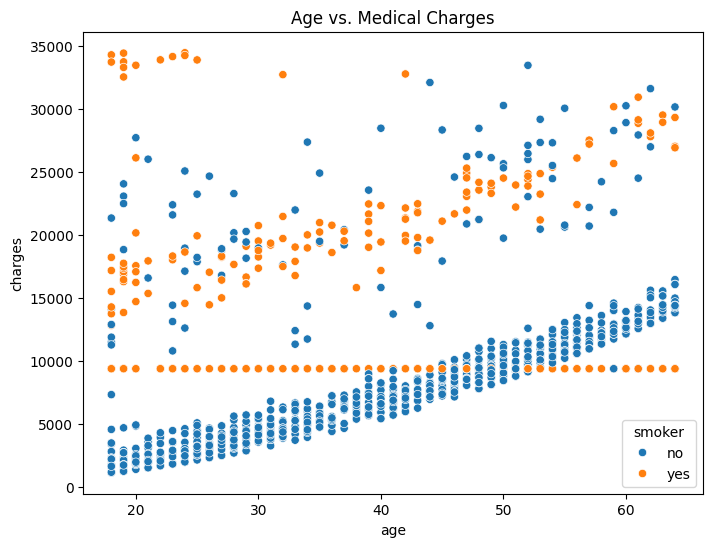

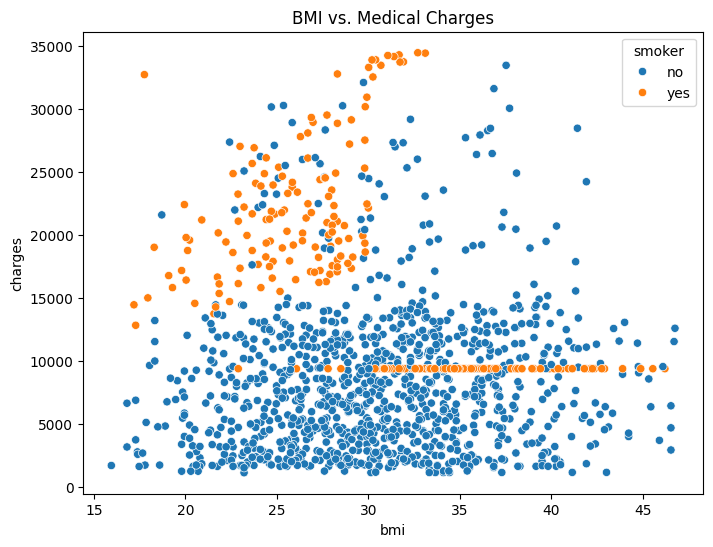

In [16]:
# Age vs. Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Age vs. Medical Charges")
plt.show()

# BMI vs. Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs. Medical Charges")
plt.show()



In [17]:

from scipy.stats import ttest_ind, f_oneway

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Id        1338 non-null   int64   
 1   age       1338 non-null   int64   
 2   sex       1338 non-null   category
 3   bmi       1338 non-null   float64 
 4   children  1338 non-null   int64   
 5   smoker    1338 non-null   category
 6   region    1338 non-null   category
 7   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(3)
memory usage: 56.8 KB


In [19]:
# Region vs. Charges

# One-hot encode 'Region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)
regions = [df[df[f'region_{region}'] == 1]['charges'] for region in ['northwest', 'southeast', 'southwest']]
f_stat, p_value = f_oneway(*regions)
print(f"ANOVA for Region vs. Charges: p-value = {p_value:.4f}")

ANOVA for Region vs. Charges: p-value = 0.0626


In [20]:
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

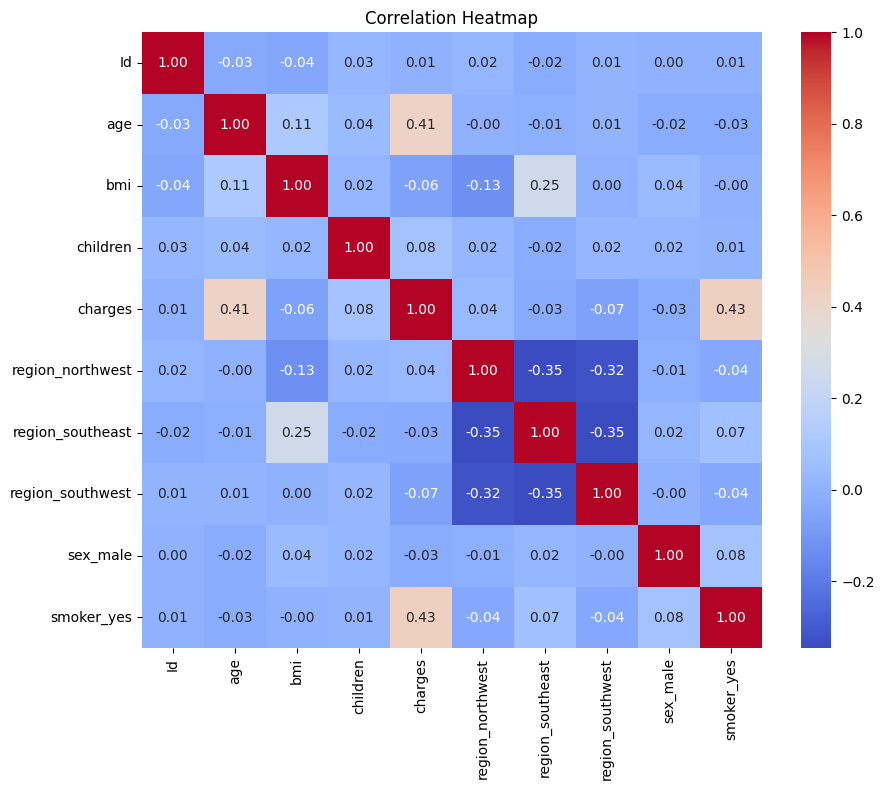

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

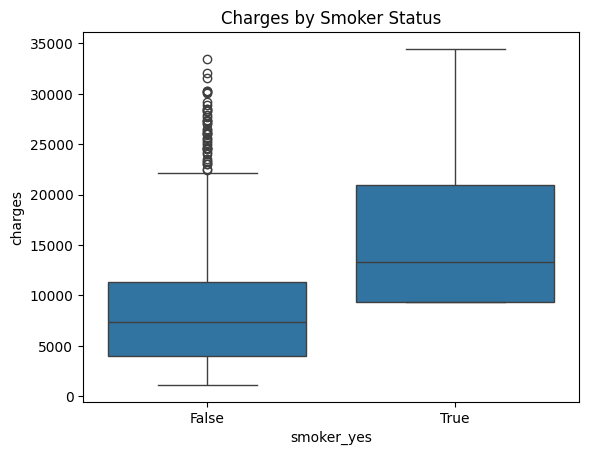

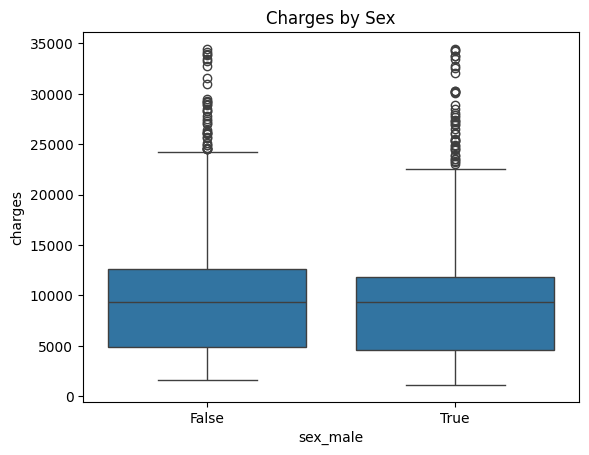

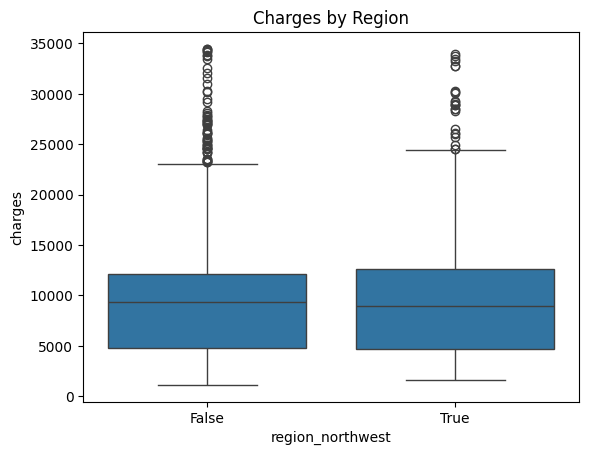

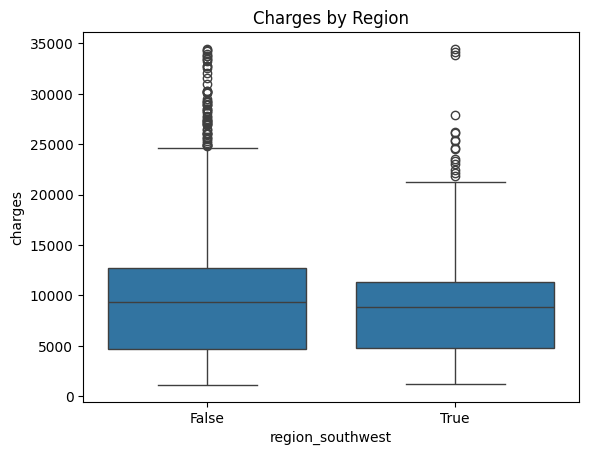

In [22]:
# Compare average medical costs across categories
sns.boxplot(x='smoker_yes', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

sns.boxplot(x='sex_male', y='charges', data=df)
plt.title('Charges by Sex')
plt.show()

sns.boxplot(x='region_northwest', y='charges', data=df)
plt.title('Charges by Region')
plt.show()

sns.boxplot(x='region_southwest', y='charges', data=df)
plt.title('Charges by Region')
plt.show()

##### Statistical Tests

In [23]:
# Smoker vs. Non-smoker charges

smoker_charges = df[df['smoker_yes'] == 'True']['charges']
non_smoker_charges = df[df['smoker_yes'] == 'False']['charges']
t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print(f"T-test for Smoker vs. Non-smoker Charges: p-value = {p_value:.4f}")

T-test for Smoker vs. Non-smoker Charges: p-value = nan


##### Feature Engineering

In [24]:
# Create BMI categories
df['BMI_Category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Create Age groups
df['Age_Group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['18-30', '31-50', '51+'])

# Log-transform Charges for modeling
df['Log_Charges'] = np.log(df['charges'])

print("\nDataset with new features:")
print(df.head())


Dataset with new features:
   Id  age     bmi  children      charges  region_northwest  region_southeast  \
0   1   19  27.900         0  16884.92400             False             False   
1   2   18  33.770         1   1725.55230             False              True   
2   3   28  33.000         3   4449.46200             False              True   
3   4   33  22.705         0  21984.47061              True             False   
4   5   32  28.880         0   3866.85520              True             False   

   region_southwest  sex_male  smoker_yes BMI_Category Age_Group  Log_Charges  
0              True     False        True   Overweight     18-30     9.734176  
1             False      True       False        Obese     18-30     7.453302  
2             False      True       False        Obese     18-30     8.400538  
3             False      True       False       Normal     31-50     9.998092  
4             False      True       False   Overweight     31-50     8.260197  


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                1338 non-null   int64   
 1   age               1338 non-null   int64   
 2   bmi               1338 non-null   float64 
 3   children          1338 non-null   int64   
 4   charges           1338 non-null   float64 
 5   region_northwest  1338 non-null   bool    
 6   region_southeast  1338 non-null   bool    
 7   region_southwest  1338 non-null   bool    
 8   sex_male          1338 non-null   bool    
 9   smoker_yes        1338 non-null   bool    
 10  BMI_Category      1338 non-null   category
 11  Age_Group         1338 non-null   category
 12  Log_Charges       1338 non-null   float64 
dtypes: bool(5), category(2), float64(3), int64(3)
memory usage: 72.3 KB


##### Predictive Modeling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare data for modeling
X = df(columns=['charges', 'Log_Charges', 'BMI_Category', 'Age_Group'])
y = df['Log_Charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(np.exp(y_test), np.exp(y_pred_lr)))

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(np.exp(y_test), np.exp(y_pred_rf)))



Linear Regression R²: 0.6342115827143243
Linear Regression MAE: 2966.4948670697777
Random Forest R²: 0.7218803090898531
Random Forest MAE: 2185.7298134216567
